In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
plt.style.use('ggplot')
df = pd.read_excel('zhipin.xlsx',encoding='utf-8')

In [55]:
print(df.head())

   title      region companyName companyField      salary experience  \
0  数据分析师  北京·海淀区·公主坟        锐捷网络      通信/网络设备  20-30K·13薪     3-5年本科   
1  数据分析师  上海·浦东新区·张江        中电金信        计算机软件      15-25K     经验不限本科   
2  数据分析师   北京·大兴区·亦庄    沃东天骏信息技术         电子商务  30-60K·14薪    5-10年本科   
3  数据分析师  北京·海淀区·马连洼          滴滴        移动互联网  15-30K·15薪     3-5年本科   
4  数据分析师   北京·海淀区·清河          小米          互联网  15-30K·14薪     3-5年本科   

        scale                                            welfare  \
0  1000-9999人  通讯补贴，节日福利，五险一金，定期体检，带薪年假，餐补，包吃，加班补助，员工旅游，零食下午茶...   
1    10000人以上                   定期体检，节日福利，五险一金，补充医疗保险，带薪年假，零食下午茶   
2    10000人以上  加班补助，免费班车，带薪年假，定期体检，补充医疗保险，全勤奖，餐补，年终奖，股票期权，节日福...   
3  1000-9999人                                   定期体检，补充医疗保险，五险一金   
4    10000人以上      餐补，补充医疗保险，股票期权，年终奖，五险一金，定期体检，节日福利，12%公积金，带薪年假   

                                          detailPage  
0  https://www.zhipin.com/job_detail/42975c4fd5ea...  
1  https://www.zhipin.com/job_detail/3f9754994eb

In [61]:
df_duplicates=df.drop_duplicates(keep='first').copy()
print(df_duplicates.head())

   title      region companyName companyField      salary experience  \
0  数据分析师  北京·海淀区·公主坟        锐捷网络      通信/网络设备  20-30K·13薪     3-5年本科   
1  数据分析师  上海·浦东新区·张江        中电金信        计算机软件      15-25K     经验不限本科   
2  数据分析师   北京·大兴区·亦庄    沃东天骏信息技术         电子商务  30-60K·14薪    5-10年本科   
3  数据分析师  北京·海淀区·马连洼          滴滴        移动互联网  15-30K·15薪     3-5年本科   
4  数据分析师   北京·海淀区·清河          小米          互联网  15-30K·14薪     3-5年本科   

        scale                                            welfare  \
0  1000-9999人  通讯补贴，节日福利，五险一金，定期体检，带薪年假，餐补，包吃，加班补助，员工旅游，零食下午茶...   
1    10000人以上                   定期体检，节日福利，五险一金，补充医疗保险，带薪年假，零食下午茶   
2    10000人以上  加班补助，免费班车，带薪年假，定期体检，补充医疗保险，全勤奖，餐补，年终奖，股票期权，节日福...   
3  1000-9999人                                   定期体检，补充医疗保险，五险一金   
4    10000人以上      餐补，补充医疗保险，股票期权，年终奖，五险一金，定期体检，节日福利，12%公积金，带薪年假   

                                          detailPage  
0  https://www.zhipin.com/job_detail/42975c4fd5ea...  
1  https://www.zhipin.com/job_detail/3f9754994eb

In [108]:
#第一，选取K的表格，然后对此表格进行操作
df_K = df.loc[df["salary"].str.contains("K")]

In [109]:
#第二提取最低工资
df_K["bottomSalary"] = df_K["salary"].astype(str).str.replace("K","").str.split("-").str[0].astype(float)
df_K["bottomSalary"] = df_K["bottomSalary"].astype(int)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
df_K["bottomSalary"]

0       20
1       15
2       30
3       15
4       15
5       25
6       20
7       18
8       15
9       15
10      15
11      15
12      15
13      15
14      20
15      15
16      15
17      25
18      15
19      14
20      12
21      25
22      11
23      15
24      15
25      20
26       6
27       7
28       7
30      15
        ..
2883    15
2884    15
2885    10
2886    18
2887    13
2888    13
2889    15
2890    10
2891    12
2892    15
2893    15
2894    10
2895    18
2896    13
2897    13
2898    15
2899    10
2900    12
2901    15
2902    15
2903    10
2904    18
2905    13
2906    13
2907    15
2908    10
2909    12
2910    15
2911    15
2912    10
Name: bottomSalary, Length: 2646, dtype: int32

In [111]:
#第三，提取最高工资
df_K["topSalary"] = df_K["salary"].astype(str).str.split("-").str[1]
df_K["topSalary"] = df_K["topSalary"].astype(str).str.split("K").str[0].astype(float)
df_K["topSalary"] = df_K["topSalary"].astype(int)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [112]:
df_K["topSalary"]

0       30
1       25
2       60
3       30
4       30
5       50
6       30
7       30
8       22
9       25
10      30
11      25
12      30
13      30
14      40
15      30
16      25
17      40
18      30
19      22
20      24
21      30
22      20
23      20
24      20
25      40
26      11
27      12
28      10
30      30
        ..
2883    30
2884    20
2885    15
2886    35
2887    15
2888    26
2889    25
2890    13
2891    23
2892    30
2893    20
2894    15
2895    35
2896    15
2897    26
2898    25
2899    13
2900    23
2901    30
2902    20
2903    15
2904    35
2905    15
2906    26
2907    25
2908    13
2909    23
2910    30
2911    20
2912    15
Name: topSalary, Length: 2646, dtype: int32

In [115]:
#把薪资转化成数据类型:int。
df_K.bottomSalary=df_K.bottomSalary.astype('int')
df_K.topSalary=df_K.topSalary.astype('int')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [116]:
#求平均薪资。
df_K['avgSalary']=df_K.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1) 
#axis是apply中的参数，axis=0表示将函数用在行，axis=1则是列。

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
df_K['avgSalary']

0       25.0
1       20.0
2       45.0
3       22.5
4       22.5
5       37.5
6       25.0
7       24.0
8       18.5
9       20.0
10      22.5
11      20.0
12      22.5
13      22.5
14      30.0
15      22.5
16      20.0
17      32.5
18      22.5
19      18.0
20      18.0
21      27.5
22      15.5
23      17.5
24      17.5
25      30.0
26       8.5
27       9.5
28       8.5
30      22.5
        ... 
2883    22.5
2884    17.5
2885    12.5
2886    26.5
2887    14.0
2888    19.5
2889    20.0
2890    11.5
2891    17.5
2892    22.5
2893    17.5
2894    12.5
2895    26.5
2896    14.0
2897    19.5
2898    20.0
2899    11.5
2900    17.5
2901    22.5
2902    17.5
2903    12.5
2904    26.5
2905    14.0
2906    19.5
2907    20.0
2908    11.5
2909    17.5
2910    22.5
2911    17.5
2912    12.5
Name: avgSalary, Length: 2646, dtype: float64

In [150]:
df_clean=df_K[['title','region','companyName','companyField','avgSalary','experience','scale','welfare','detailPage']].copy()
print(df_clean.head())

   title      region companyName companyField  avgSalary experience  \
0  数据分析师  北京·海淀区·公主坟        锐捷网络      通信/网络设备       25.0     3-5年本科   
1  数据分析师  上海·浦东新区·张江        中电金信        计算机软件       20.0     经验不限本科   
2  数据分析师   北京·大兴区·亦庄    沃东天骏信息技术         电子商务       45.0    5-10年本科   
3  数据分析师  北京·海淀区·马连洼          滴滴        移动互联网       22.5     3-5年本科   
4  数据分析师   北京·海淀区·清河          小米          互联网       22.5     3-5年本科   

        scale                                            welfare  \
0  1000-9999人  通讯补贴，节日福利，五险一金，定期体检，带薪年假，餐补，包吃，加班补助，员工旅游，零食下午茶...   
1    10000人以上                   定期体检，节日福利，五险一金，补充医疗保险，带薪年假，零食下午茶   
2    10000人以上  加班补助，免费班车，带薪年假，定期体检，补充医疗保险，全勤奖，餐补，年终奖，股票期权，节日福...   
3  1000-9999人                                   定期体检，补充医疗保险，五险一金   
4    10000人以上      餐补，补充医疗保险，股票期权，年终奖，五险一金，定期体检，节日福利，12%公积金，带薪年假   

                                          detailPage  
0  https://www.zhipin.com/job_detail/42975c4fd5ea...  
1  https://www.zhipin.com/job_detail/3f9754994eb4...  

In [151]:
print(df_clean.region.value_counts())

深圳·南山区·科技园          55
南京·江宁区·秣陵           48
北京·朝阳区·望京           33
北京                  32
北京·海淀区·西北旺          31
北京·大兴区·亦庄           29
上海                  26
上海·徐汇区·漕河泾          25
北京·海淀区·上地           21
杭州·西湖区·西溪           21
长沙·岳麓区·麓谷           21
西安·雁塔区·高新软件园        20
广州                  19
成都·武侯区·新会展中心        19
南京·雨花台区·铁心桥         19
上海·浦东新区·张江          18
杭州·滨江区·长河           18
北京·海淀区·中关村          17
杭州                  17
昌吉回族自治州·昌吉市·长宁南路    15
惠州·惠城区·仲恺           15
深圳·龙岗区·坂田           14
上海·浦东新区·陆家嘴         13
威海·环翠区·草庙子          13
成都                  13
广州·黄埔区·中心城          13
广州·海珠区·琶洲           13
桂林·临桂区·花生唐          13
北京·朝阳区·酒仙桥          12
杭州·余杭区·仓前           11
                    ..
南宁·青秀区·东葛路           1
成都·武侯区·红牌楼           1
银川·兴庆区·穆斯林商贸城        1
赣州                   1
太原·小店区·南中环街          1
杭州·西湖区·转塘            1
上海·普陀区·真光            1
绵阳·涪城区·市中心           1
深圳·福田区·香蜜湖           1
中山·小榄镇·小榄人民医院        1
广州·越秀区·沿江路           1
沧州·河间市·城垣中路          1
无锡·锡山区·东港  

职位数量前3名：深圳·南山区·科技园、南京·江宁区·秣陵、北京·朝阳区·望京。深圳·南山区·科技园 55，职位需求量大。

In [152]:
print(df_clean.avgSalary.describe())

count    2646.000000
mean       14.512850
std        10.380112
min         1.500000
25%         7.500000
50%        11.500000
75%        18.000000
max        87.500000
Name: avgSalary, dtype: float64


平均薪资：14.5K，中位数：11.5K，最高：87.5K。

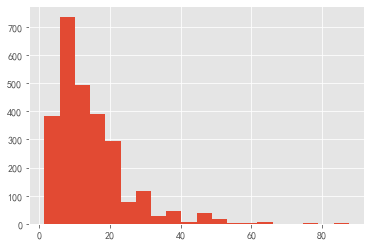

In [153]:
plt.rcParams['font.sans-serif']=['SimHei']
df_clean.avgSalary.hist(bins=20)
plt.show()

In [154]:
#groupby()分组，median()中位数，sort_values（ascending=False）排序（降序）。
df_clean.groupby(df_clean.region).avgSalary.median().sort_values(ascending=False)

region
北京·东城区·东四             65.00
北京·石景山区·杨庄            65.00
上海·静安区·海宁路            62.50
深圳·福田区·福田保税区          60.00
上海·浦东新区·外高桥           52.50
北京·东城区·东直门            50.00
北京·海淀区·回龙观            45.00
上海·普陀区·长征             45.00
上海·长宁区·新华路            45.00
北京·昌平区·天通苑            45.00
上海·静安区·南京西路           42.50
深圳·龙岗区·龙岗中心城          40.00
北京·海淀区·魏公村            37.50
深圳·龙岗区·华为坂田基地         37.50
南京·秦淮区·洪家园            37.50
杭州·西湖区·文三路            37.50
杭州·余杭区·西溪             37.50
北京·海淀区·苏州桥            35.00
杭州·拱墅区·万达广场           34.50
西安·长安区                33.00
上海·普陀区·长风             32.75
杭州·西湖区·转塘             32.50
北京·海淀区·北太平庄           32.50
上海·闵行区·华漕             32.50
上海·黄浦区·打浦桥            32.50
深圳·龙华区·大浪             32.00
杭州·余杭区·未来科技城          31.50
南京·雨花台区·小行            31.25
西安·长安区·航天城            31.00
南京·栖霞区·摄山             30.50
                      ...  
韶关                     3.50
平顶山·湛河区·双丰光明路          3.50
荆门·东宝区·象山大道            3.50
洛阳·涧西区·广州市场            3.50
盐城           

中位数从高到低分别是北京·东城区·东四、北京·石景山区·杨庄 、上海·静安区·海宁路......郑州·中原区·碧沙岗

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


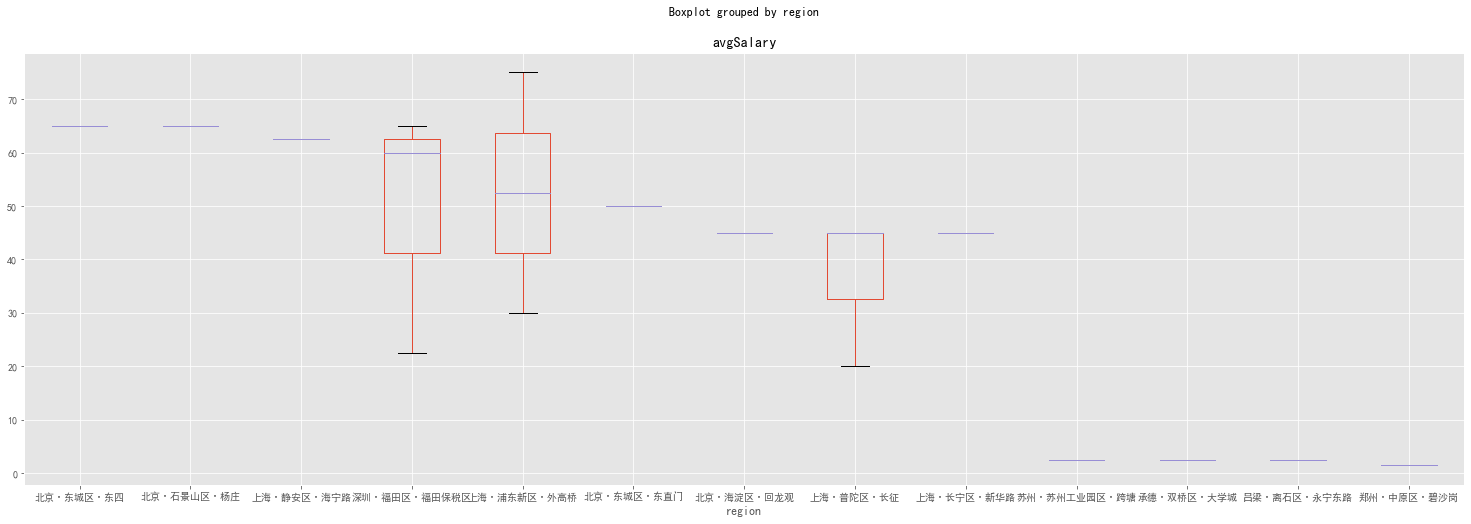

In [155]:
#转化成category格式，方便重新排序索引值，为了让箱体图中位数从高到低排列。
df_clean.region=df_clean.region.astype('category')
df_clean.region.cat.set_categories(['北京·东城区·东四','北京·石景山区·杨庄','上海·静安区·海宁路','深圳·福田区·福田保税区','上海·浦东新区·外高桥','北京·东城区·东直门','北京·海淀区·回龙观','上海·普陀区·长征','上海·长宁区·新华路','苏州·苏州工业园区·跨塘','承德·双桥区·大学城','吕梁·离石区·永宁东路','郑州·中原区·碧沙岗'],inplace=True)
df_clean.boxplot(column='avgSalary',by='region',figsize=(25,8))
plt.show()
#boxplot是调用箱线图函数，column选择箱线图的数值，by是选择分类变量，figsize是尺寸。

In [156]:
print(df_clean.groupby(df_clean.region).avgSalary.mean().sort_values(ascending=False))

region
北京·石景山区·杨庄      65.000000
北京·东城区·东四       65.000000
上海·静安区·海宁路      62.500000
上海·浦东新区·外高桥     52.500000
北京·东城区·东直门      50.000000
深圳·福田区·福田保税区    49.166667
上海·长宁区·新华路      45.000000
北京·海淀区·回龙观      45.000000
上海·普陀区·长征       36.666667
吕梁·离石区·永宁东路      2.500000
承德·双桥区·大学城       2.500000
苏州·苏州工业园区·跨塘     2.500000
郑州·中原区·碧沙岗       1.500000
Name: avgSalary, dtype: float64


平均值从高到低依次排列：北京·石景山区·杨庄、北京·东城区·东四、上海·静安区·海宁路、上海·浦东新区·外高桥、北京·东城区·东直门、深圳·福田区·福田保税区、上海·长宁区·新华路、北京·海淀区·回龙观、上海·普陀区·长征、吕梁·离石区·永宁东路、承德·双桥区·大学城、苏州·苏州工业园区·跨塘、郑州·中原区·碧沙岗。
北京·石景山区·杨庄和北京·东城区·东四达到65K。

In [157]:
print(df_clean.groupby('companyName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending=False))

             count       mean
companyName                  
中软国际           150  17.630000
法本              67  12.522388
博彦科技            52  14.086538
软通动力信息技术集团      36  13.861111
神州信息            18  12.527778
中电金信            17  20.794118
腾讯              15  25.800000
软通动力            15  15.733333
华为              14  26.571429
多益网络            13  15.807692
京东集团            12  28.166667
北京字节跳动           9  23.111111
百度               9  28.000000
华为技术有限公司         9  34.166667
BOSS直聘           8  22.312500
睿服科技             7  16.142857
国双科技             7  12.785714
中公教育             7   6.285714
阿里巴巴集团           7  33.071429
滴滴               7  31.285714
饿了么              6  34.333333
今日头条             6  35.583333
京东世纪贸易有限公司       6  19.166667
易观智库             6  17.500000
蚂蚁金服             6  35.166667
之江实验室            6  25.750000
中科创达软件           6  17.000000
中国移动研究院          5  17.700000
维智               5  27.600000
先进数通             5  15.900000
...            ...        ...
安踏        

In [158]:
df_clean.groupby('companyName').avgSalary.agg(lambda x:max(x)-min(x))

def topN(df,n=5):
    counts=df.value_counts()
    return counts.sort_values(ascending=False)[:n]

print(df_clean.groupby('region').companyName.apply(topN))

region                   
北京·东城区·东四     青萌数海科技         1
北京·石景山区·杨庄    北京易华录          1
上海·静安区·海宁路    眼控科技           1
深圳·福田区·福田保税区  盈合机器人          1
              深圳联影研究院        1
              粤港澳大湾区数字...    1
上海·浦东新区·外高桥   华为技术有限公司       1
              药明康德           1
北京·东城区·东直门    百观科技           2
北京·海淀区·回龙观    滴滴             1
上海·普陀区·长征     饿了么            2
              上海昶昌           1
上海·长宁区·新华路    魔力猫盒           2
苏州·苏州工业园区·跨塘  苏州鸿优嘉          1
承德·双桥区·大学城    博彦科技           1
吕梁·离石区·永宁东路   鸿雁科技           1
郑州·中原区·碧沙岗    河南双泽美丽家装饰      1
Name: companyName, dtype: int64


In [159]:
print(df_clean.groupby('region').title.apply(topN))

region                          
北京·东城区·东四     数据科学家                 1
北京·石景山区·杨庄    大数据架构师                1
上海·静安区·海宁路    人工智能（AI）科学家/资深算       1
深圳·福田区·福田保税区  后端开发工程师               1
              机器学习资深研究员             1
              医学图像分析资深专家(J11742)    1
上海·浦东新区·外高桥   算法研究                  1
              数据挖掘专家                1
北京·东城区·东直门    高级大数据开发工程师            2
北京·海淀区·回龙观    高级数据分析师               1
上海·普陀区·长征     物流算法专家（机器学习方向）        1
              数据挖掘-高级算法专家           1
              web前端开发工程师            1
上海·长宁区·新华路    大数据研发经理               2
苏州·苏州工业园区·跨塘  机器视觉实习生（2022届）        1
承德·双桥区·大学城    数据审核专员+双休+法定节假日休假     1
吕梁·离石区·永宁东路   人工智能                  1
郑州·中原区·碧沙岗    设计师助理带薪学习＋免费住宿        1
Name: title, dtype: int64


In [163]:
bins=[0,3,5,10,15,20,30,100]
level=['0-3','3-5','5-10','10-15','15-20','20-30','30+']
df_clean['level']=pd.cut(df_clean['avgSalary'],bins=bins,labels=level)
print(df_clean[['experience','level']])

     experience  level
0        3-5年本科  20-30
1        经验不限本科  15-20
2       5-10年本科    30+
3        3-5年本科  20-30
4        3-5年本科  20-30
5       5-10年本科    30+
6        1-3年本科  20-30
7       5-10年本科  20-30
8        3-5年本科  15-20
9        3-5年本科  15-20
10       经验不限本科  20-30
11       3-5年本科  15-20
12       1-3年本科  20-30
13       3-5年本科  20-30
14       3-5年硕士  20-30
15       3-5年本科  20-30
16       1-3年本科  15-20
17       1年以内本科    30+
18      5-10年本科  20-30
19       3-5年本科  15-20
20       1-3年本科  15-20
21      5-10年硕士  20-30
22       1-3年本科  15-20
23       1-3年本科  15-20
24       3-5年本科  15-20
25       3-5年本科  20-30
26       经验不限本科   5-10
27       1-3年本科   5-10
28       1-3年本科   5-10
30     3-5年学历不限  20-30
...         ...    ...
2883     3-5年本科  20-30
2884     1-3年本科  15-20
2885     经验不限本科  10-15
2886     经验不限本科  20-30
2887     3-5年大专  10-15
2888     经验不限本科  15-20
2889    5-10年本科  15-20
2890     3-5年大专  10-15
2891     1-3年本科  15-20
2892     3-5年本科  20-30
2893     1-3年本科  15-20
2894     经验

In [165]:
print(df_clean.title)

0                数据分析师
1                数据分析师
2                数据分析师
3                数据分析师
4                数据分析师
5                数据分析师
6                数据分析师
7                数据分析师
8                数据分析师
9                数据分析师
10               数据分析师
11               数据分析师
12               数据分析师
13               数据分析师
14               数据分析师
15               数据分析师
16               数据分析师
17               数据分析师
18               数据分析师
19               数据分析师
20               数据分析师
21               数据分析师
22               数据分析师
23               数据分析师
24               数据分析师
25               数据分析师
26               数据分析师
27               数据分析师
28               数据分析师
30                数据分析
             ...      
2883             大数据开发
2884             大数据开发
2885             大数据开发
2886             大数据开发
2887    大数据开发工程师（新疆昌吉）
2888             大数据开发
2889           高级大数据开发
2890            大数据工程师
2891             大数据开发
2892             大数据开发
2893             大数据开发
2894             大数据开发
2895       

In [168]:
word=df_clean.title.str.replace(' ','')
print(word)

0                数据分析师
1                数据分析师
2                数据分析师
3                数据分析师
4                数据分析师
5                数据分析师
6                数据分析师
7                数据分析师
8                数据分析师
9                数据分析师
10               数据分析师
11               数据分析师
12               数据分析师
13               数据分析师
14               数据分析师
15               数据分析师
16               数据分析师
17               数据分析师
18               数据分析师
19               数据分析师
20               数据分析师
21               数据分析师
22               数据分析师
23               数据分析师
24               数据分析师
25               数据分析师
26               数据分析师
27               数据分析师
28               数据分析师
30                数据分析
             ...      
2883             大数据开发
2884             大数据开发
2885             大数据开发
2886             大数据开发
2887    大数据开发工程师（新疆昌吉）
2888             大数据开发
2889           高级大数据开发
2890            大数据工程师
2891             大数据开发
2892             大数据开发
2893             大数据开发
2894             大数据开发
2895       

In [169]:
df_word=word.dropna().str.split(',').apply(pd.value_counts) 
print(df_word)

      数据分析师  数据分析  高级数据分析师  数据分析师(MJ000122)  SCG-数据分析师  大气数据分析师  数据分析师BI  \
0       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
1       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
2       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
3       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
4       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
5       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
6       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
7       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
8       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
9       1.0   NaN      NaN              NaN        NaN      NaN      NaN   
10      1.0   NaN      NaN              NaN        NaN      NaN      NaN   
11      1.0   NaN      NaN              NaN        NaN      NaN      NaN   
12      1.0 

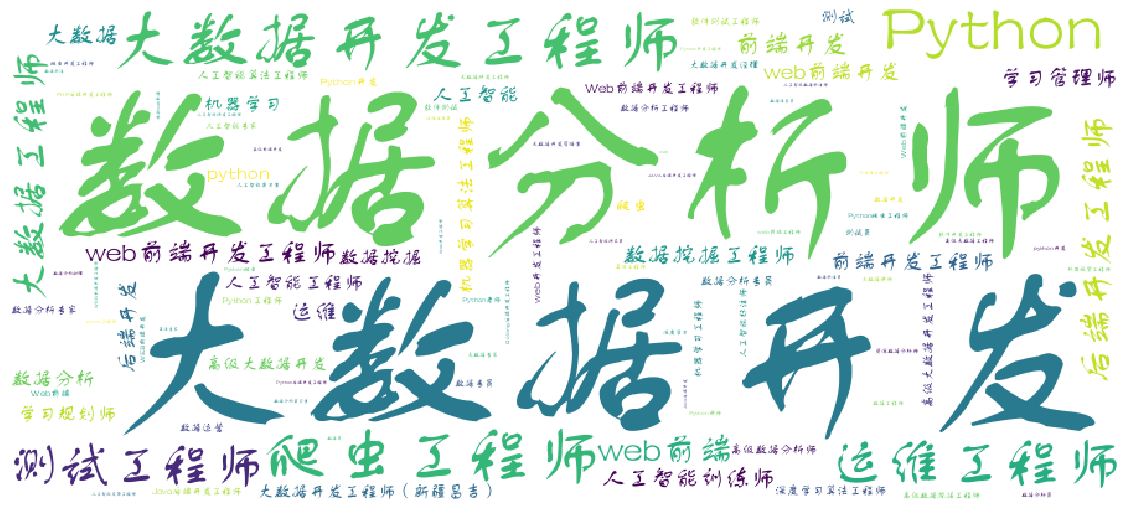

In [171]:
df_word_counts=df_word.unstack().dropna().reset_index().groupby('level_0').count()

from wordcloud import WordCloud
df_word_counts.index=df_word_counts.index.str.replace("'","")

wc=WordCloud(font_path=r'C:\Windows\Fonts\FZSTK.TTF',width=900,height=400,background_color='white')
fig,ax=plt.subplots(figsize=(20,15))
wc.fit_words(df_word_counts.level_1)
ax=plt.imshow(wc)
plt.axis('off')
plt.show()

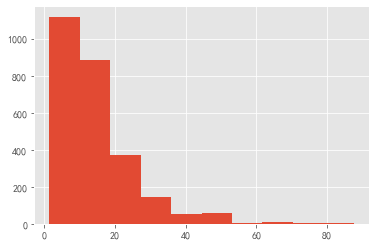

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')#使用ggplot作为配色风格
df_clean.avgSalary.hist()

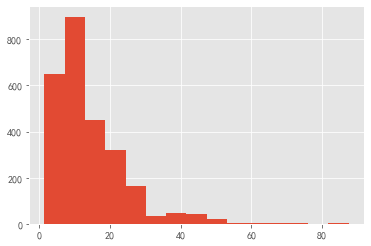

In [174]:
df_clean.avgSalary.hist(bins=15)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


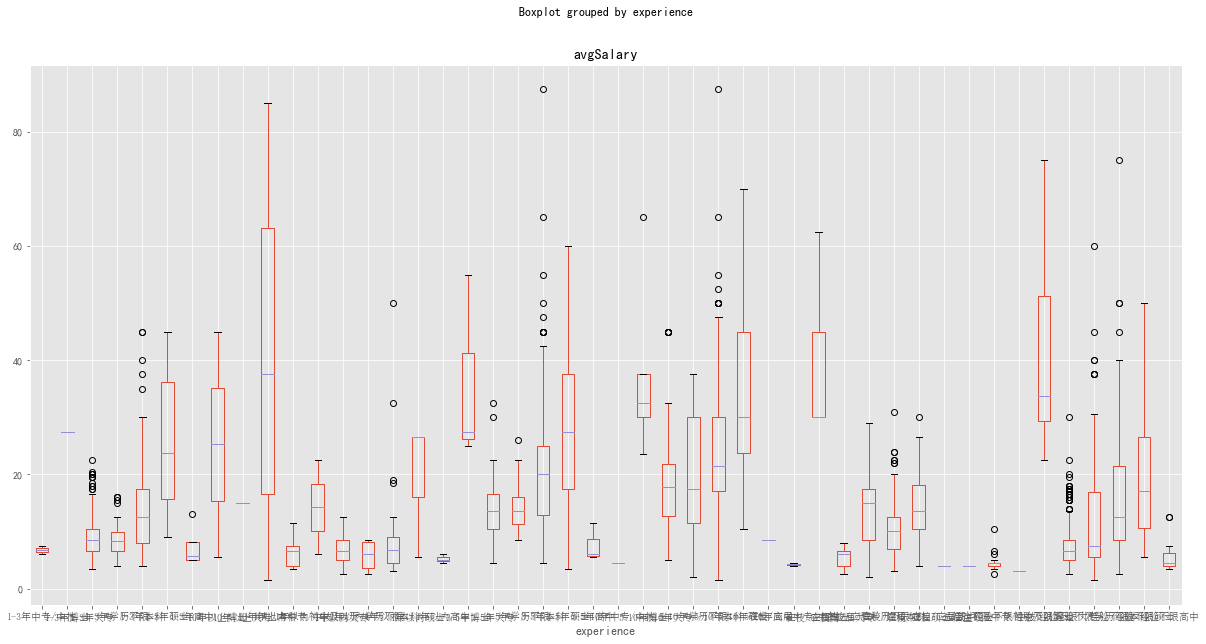

In [183]:
#学历和薪资的关系
df_box2 = df_clean.boxplot(column = 'avgSalary',by = 'experience',figsize = (20,10))
for label in df_box2.get_xticklabels():
    label.set_fontproperties(font_zh)

In [189]:
# 不同公司规模
pos_csize_data = df_clean[df_clean['region']=='深圳·南山区·科技园'].groupby(['companyField', 'scale']).count().reset_index().pivot('companyField','scale','title')
pos_csize_data
pos_csize_data.plot.bar(title='test', figsize=(16, 8), rot=45, fontsize=15)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match